## Make patches from labels

Make a set of augmented patches from labels.

The difference between labels and patches is:

1.  Labels are a set of images and annotated ground truths, generated manually, or automatically.  Labels can be different sizes.
2.  Patches are a set of images and annotated ground truths generated from labels.  They are usually cropped from labels to be all the same size.  They are often augmented.  1 label can be used to generate many patches. 

num inputs:  1
num ground truth:  2
image label paths [WindowsPath('D:/images/tnia-python-images/imagesc/2024_05_07_ct_scan/labels/input0')]
image_label_path 0:  D:\images\tnia-python-images\imagesc\2024_05_07_ct_scan\labels\input0
json_files:  ['D:\\images\\tnia-python-images\\imagesc\\2024_05_07_ct_scan\\labels\\input0\\Cored_NonMachined_rec00000489_1.json']
Cored_NonMachined_rec00000489_1
[83, 527, 1055, 1203]


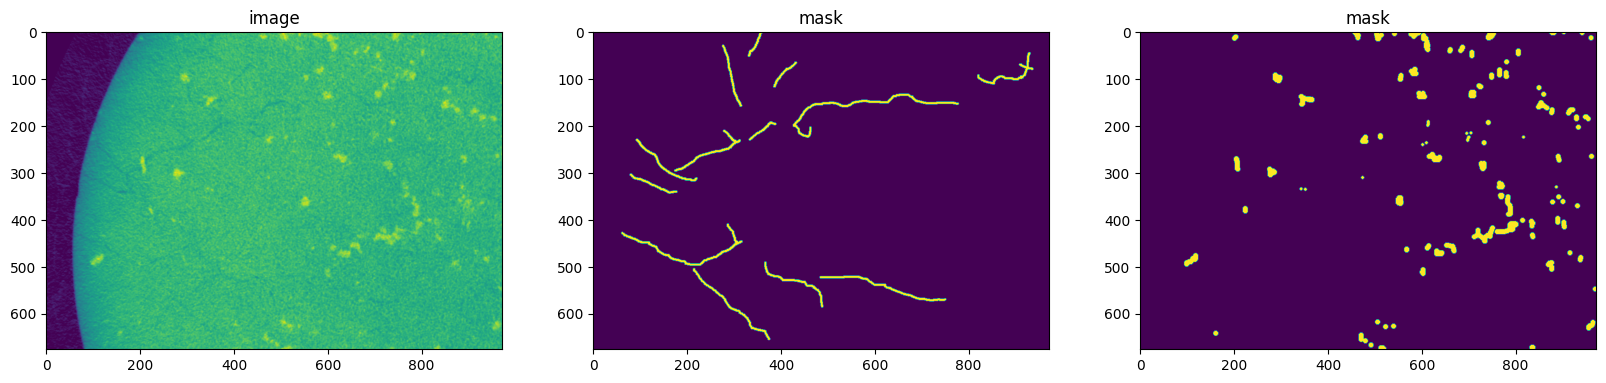

In [33]:
from skimage.io import imread
from pathlib import Path
from matplotlib import pyplot as plt
from tnia.plotting.plt_helper import imshow_multi2d
import numpy as np
from tnia.deeplearning.dl_helper import quantile_normalization
import json
from tnia.deeplearning.dl_helper import get_label_paths
from glob import glob
import os

tnia_images_path = Path("D:/images/tnia-python-images")
parent_path=Path(tnia_images_path / r'imagesc/2024_05_07_ct_scan')
label_path = Path(parent_path / r'labels')

json_ = json.load(open(label_path / 'info.json'))

num_inputs = json_['num_inputs']
num_ground_truth = json_['num_truths']

print('num inputs: ', num_inputs)   
print('num ground truth: ', num_ground_truth)

image_label_paths, mask_label_paths = get_label_paths(1, 2, label_path)

print('image label paths',image_label_paths)
print("image_label_path 0: ", image_label_paths[0])

# get list of json files in image_label_path
json_files = glob(str(os.path.join(image_label_paths[0], '*.json'))) 
print("json_files: ", json_files)

i=0
json_ = json.load(open(json_files[i]))

base_name = json_['base_name']
bbox = json_['bbox']
print(base_name)
print(bbox)

image = imread(str(image_label_paths[0]/ (base_name + ".tif")))

labels = []

for mask_label_path in mask_label_paths:
    label = imread(os.path.join(mask_label_path / (base_name+".tif")))
    labels.append(label)

images_to_show=[]
titles = []
images_to_show.append(image)
titles.append("image")

for label in labels:
    images_to_show.append(label)
    titles.append("mask")
fig = imshow_multi2d(images_to_show, titles, 1, len(images_to_show), width=20, height=10)

## Normalize image here

Normalization is always tricky.  We want to normalize based on the expected range in real images, which are often larger than training patches.  In this case there is a dark border around the structure so we want to normalize first, then extract the patches, so that all patches are normalized based on the expected intensity range of full sized images (not intensity range of the patch)

In [34]:
image = quantile_normalization(image).astype(np.float32)

In [35]:
import os
from tnia.deeplearning.augmentation import uber_augmenter

patch_path= parent_path / 'patches' 

if not os.path.exists(patch_path):
    os.mkdir(patch_path)
axes = 'YXC'
sub_sample = 1

#uber_augmenter(image, labels, patch_path, 'eyes', 256, 500, do_random_gamma=True, do_color_jitter=True)


uber_augmenter(image, labels, patch_path, 'grid', 256, 200, do_random_gamma=True)



c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:213: UserWarning: D:\images\tnia-python-images\imagesc\2024_05_07_ct_scan\patches\input0\grid_140.tif is a low contrast image
  
c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:213: UserWarning: D:\images\tnia-python-images\imagesc\2024_05_07_ct_scan\patches\input0\grid_156.tif is a low contrast image
  
c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:213: UserWarning: D:\images\tnia-python-images\imagesc\2024_05_07_ct_scan\patches\input0\grid_184.tif is a low contrast image
  
c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:213: UserWarning: D:\images\tnia-python-images\imagesc\2024_05_07_ct_scan\patches\input0\grid_195.tif is a low contrast image
  
